In [3]:
import pandas as pd
import numpy as np
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

In [4]:
pred_path = "../result/fullmodel_ensembled.csv"

In [7]:
pred_df = pd.read_csv(pred_path)
pred_df

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_1_001_CA_1_validation,0.853074,0.838137,0.861810,0.883016,1.104932,1.252986,1.231093,1.086127,1.043745,...,1.085498,1.360174,1.276569,0.995182,0.912604,0.914836,0.920641,1.070453,1.294694,1.241042
1,FOODS_1_001_CA_2_validation,1.062615,1.030421,0.947479,1.051179,1.214354,1.461596,1.705463,1.070579,1.115768,...,1.283398,1.560823,1.646434,1.019613,1.044922,1.009770,1.120629,1.281983,1.493999,1.456750
2,FOODS_1_001_CA_3_validation,0.945132,1.066415,1.043755,1.045503,1.132598,1.344631,1.503619,1.184932,1.189144,...,1.203190,1.472153,1.727591,1.243467,1.197945,1.140894,1.112669,1.234990,1.353020,1.319093
3,FOODS_1_001_CA_4_validation,0.396658,0.404114,0.425313,0.446385,0.478856,0.511210,0.509034,0.437019,0.441983,...,0.464209,0.484434,0.474676,0.432320,0.409293,0.425642,0.435216,0.488425,0.488613,0.453360
4,FOODS_1_001_TX_1_validation,0.072938,0.413112,0.402168,0.394608,0.469315,0.446370,0.368108,0.391974,0.414164,...,0.385954,0.418130,0.399971,0.321602,0.360733,0.376162,0.371086,0.395230,0.451974,0.442069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,HOUSEHOLD_2_516_TX_2_evaluation,0.225307,0.241155,0.267627,0.286343,0.322613,0.399087,0.362578,0.259490,0.272624,...,0.260184,0.350493,0.360932,0.232430,0.220095,0.248772,0.247389,0.275978,0.340370,0.319517
60976,HOUSEHOLD_2_516_TX_3_evaluation,0.116991,0.148209,0.156898,0.150768,0.202470,0.203209,0.181389,0.132196,0.142579,...,0.153343,0.183219,0.174279,0.127011,0.120240,0.128097,0.140594,0.169374,0.204397,0.193916
60977,HOUSEHOLD_2_516_WI_1_evaluation,0.072253,0.080529,0.082011,0.089804,0.119452,0.129597,0.120677,0.086110,0.086835,...,0.106671,0.123836,0.108987,0.077120,0.075662,0.077157,0.081625,0.108252,0.125845,0.111937
60978,HOUSEHOLD_2_516_WI_2_evaluation,0.055285,0.062440,0.065545,0.074232,0.092165,0.096362,0.094412,0.073817,0.074365,...,0.097345,0.110249,0.096988,0.076782,0.073336,0.074118,0.069263,0.085304,0.095203,0.083017


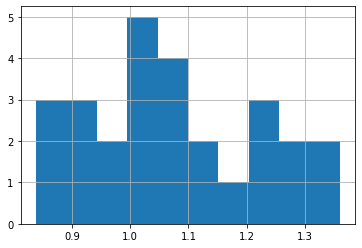

In [6]:
pred_df.iloc[0, 2:].hist(bins=10)

In [48]:
def round_pred(x):
    thresh = 1e-5
    rounded = int(Decimal(str(x)).quantize(Decimal('0'), rounding=ROUND_HALF_UP))
    if abs(x-rounded) < thresh:
        return float(rounded)
    else:
        return x


In [49]:
cols = [f"F{i}" for i in range(1,29)]
pred_df[cols] = pred_df[cols].applymap(round_pred)

In [50]:
pred_df.to_csv(f"../result/fullmodel_submission_fold1_rounded_1e-5.csv",index=False)

In [51]:
pred_df.tail()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
60975,HOUSEHOLD_2_516_TX_2_evaluation,0.182969,0.209926,0.208313,0.211863,0.232938,0.260188,0.247631,0.231087,0.221568,...,0.240609,0.269633,0.270206,0.189261,0.179820,0.180747,0.175305,0.217579,0.238144,0.231016
60976,HOUSEHOLD_2_516_TX_3_evaluation,0.070388,0.149237,0.140875,0.140857,0.162340,0.181317,0.172440,0.145270,0.142553,...,0.139740,0.152295,0.153885,0.127205,0.121573,0.122921,0.129504,0.137973,0.157109,0.152892
60977,HOUSEHOLD_2_516_WI_1_evaluation,0.080200,0.123315,0.128469,0.138791,0.171651,0.171751,0.138289,0.121861,0.119954,...,0.146048,0.173147,0.152901,0.125891,0.123301,0.127199,0.130302,0.148912,0.181877,0.168050
60978,HOUSEHOLD_2_516_WI_2_evaluation,0.087174,0.118780,0.123579,0.132279,0.142217,0.120945,0.110664,0.118227,0.118139,...,0.130189,0.137288,0.121633,0.119184,0.115533,0.119414,0.123456,0.127326,0.133521,0.123023
60979,HOUSEHOLD_2_516_WI_3_evaluation,0.022690,0.118764,0.123282,0.136150,0.154632,0.148380,0.134995,0.131360,0.128053,...,0.139543,0.146320,0.136677,0.122038,0.116707,0.120397,0.125005,0.135412,0.146431,0.136578


# ensemble with averaging

In [33]:
paths = [f"../result/fullmodel_submission_fold{i}.csv" for i in range(1,4,1)]
paths

['../result/fullmodel_submission_fold1.csv',
 '../result/fullmodel_submission_fold2.csv',
 '../result/fullmodel_submission_fold3.csv']

In [36]:
pred_df.iloc[:, 1:]

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,0.840856,0.799347,0.830415,0.772715,0.966857,1.115042,0.974236,1.000000,1.022600,1.221406,...,1.071161,1.372347,1.248501,0.987562,0.884728,0.919386,0.885658,1.045471,1.275815,1.164683
1,0.840990,0.619770,0.717173,0.824941,1.000000,1.264250,1.435884,0.977256,0.935772,1.192508,...,1.220318,1.454582,1.533489,0.904221,0.867539,0.891114,0.985898,1.156595,1.407526,1.299374
2,0.883851,0.763914,0.827877,0.848189,0.962355,1.194968,1.000000,0.933112,0.936049,1.089699,...,1.246403,1.434837,1.501778,1.092539,0.921894,0.980738,0.965209,1.165326,1.175307,1.017117
3,0.314739,0.305571,0.311008,0.308496,0.334647,0.423934,0.424305,0.383299,0.362468,0.438218,...,0.430290,0.438594,0.437580,0.391377,0.323126,0.338771,0.307781,0.380097,0.392480,0.366478
4,0.105030,0.419265,0.469959,0.399025,0.520392,0.410706,0.264029,0.328346,0.312872,0.325510,...,0.374953,0.434125,0.416728,0.328097,0.332844,0.353533,0.354720,0.383268,0.425709,0.405572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,0.256360,0.232602,0.265360,0.273514,0.330561,0.408577,0.437211,0.308398,0.251190,0.237564,...,0.310944,0.406158,0.406710,0.298028,0.259845,0.264499,0.273724,0.334687,0.406047,0.380490
60976,0.125713,0.174393,0.180449,0.154579,0.212026,0.217374,0.236855,0.164267,0.159000,0.142333,...,0.171320,0.216082,0.211725,0.154684,0.136288,0.142157,0.148326,0.185510,0.224149,0.246665
60977,0.057382,0.057884,0.058121,0.072407,0.118066,0.171735,0.167692,0.075552,0.068461,0.064207,...,0.106842,0.120934,0.110280,0.061375,0.055956,0.057493,0.065074,0.104794,0.120282,0.117427
60978,0.060367,0.060791,0.056152,0.059525,0.081482,0.122068,0.118688,0.074384,0.065581,0.059542,...,0.066543,0.087052,0.079439,0.051636,0.047508,0.048535,0.057613,0.076361,0.090566,0.081424


In [40]:
for idx, p in enumerate(paths):
    sub = pd.read_csv(p)
    
    if idx == 0:
        ensembled_sub = sub.copy()
    else:
        ensembled_sub.iloc[:, 1:] += sub.copy().iloc[:, 1:]
ensembled_sub.iloc[:, 1:] = ensembled_sub.iloc[:, 1:] / len(paths)

In [43]:
ensembled_sub.to_csv("../result/fullmodel_ensembled.csv",index=False)